In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True

In [3]:
con = sa.create_engine("sqlite:///DatosValencia/airbnbValencia.db")

In [4]:
# first trick: with inspect we can see what the data tables have

In [5]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['listings', 'listings_det']

In [6]:
inspector = sa.inspect(con)
print("Tablas en la base de datos:", inspector.get_table_names())

Tablas en la base de datos: ['listings', 'listings_det']


In [7]:
pip install --upgrade sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
listings = pd.read_sql_table("listings", con=con) 
listings_det = pd.read_sql_table("listings_det", con=con)

In [9]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,48154,Precioso apartamento con wifi,219476,Antonio,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,92.0,3,161,2024-06-12,0.97,4,81,31,VT-41540-V
1,1,136378,Old City Charm with Modern Comfort,591197,Elisa,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75.0,28,25,2023-06-30,0.16,2,0,1,VT-42161-V
2,2,149715,1900 Style Valencian Beach Home for 10px,5947,Susana Barbara,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,269.0,2,259,2024-06-17,1.65,1,260,38,Nº TURISMO VT36469V CATEGORIA: standard
3,3,165971,★ Architectural touch! ★,791187,Inés,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,132.0,5,517,2024-06-05,3.29,7,16,45,VT-32757-V
4,4,182221,Apartments Calatrava City Valencia,1315567,Chiara,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,180.0,3,8,2024-05-04,0.07,2,336,1,VT-38755-V


In [10]:
precio_m2 = pd.read_csv("DatosValencia/idealista.csv") \
    .loc[1:,["table__cell 2", "icon-elbow"]] \
    .rename(columns = {"table__cell 2":"precio_m2", "icon-elbow":"distrito"})

precio_m2

,precio_m2,distrito
1,2.792 €/m2,Algirós
2,2.112 €/m2,Benicalap
3,2.643 €/m2,Benimaclet
4,2.896 €/m2,Camins al Grau
5,2.870 €/m2,Campanar
6,3.832 €/m2,Ciutat Vella
7,3.534 €/m2,El Pla del Real
8,3.125 €/m2,Extramurs
9,2.078 €/m2,Jesús
10,4.112 €/m2,L'Eixample


In [11]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  14 non-null     object
 1   distrito   14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [12]:
# we don't want the price to be an object, we need to clean it up

In [13]:

precio_m2.precio_m2 = precio_m2.precio_m2.str.split(expand = True)[0].str.replace(".", "").astype("int")


In [14]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  14 non-null     int64 
 1   distrito   14 non-null     object
dtypes: int64(1), object(1)
memory usage: 356.0+ bytes


In [15]:
# Now let's move on to the data quality of the others


In [16]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,48154,Precioso apartamento con wifi,219476,Antonio,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,92.0,3,161,2024-06-12,0.97,4,81,31,VT-41540-V
1,1,136378,Old City Charm with Modern Comfort,591197,Elisa,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75.0,28,25,2023-06-30,0.16,2,0,1,VT-42161-V
2,2,149715,1900 Style Valencian Beach Home for 10px,5947,Susana Barbara,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,269.0,2,259,2024-06-17,1.65,1,260,38,Nº TURISMO VT36469V CATEGORIA: standard
3,3,165971,★ Architectural touch! ★,791187,Inés,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,132.0,5,517,2024-06-05,3.29,7,16,45,VT-32757-V
4,4,182221,Apartments Calatrava City Valencia,1315567,Chiara,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,180.0,3,8,2024-05-04,0.07,2,336,1,VT-38755-V


In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           9596 non-null   int64  
 1   id                              9596 non-null   int64  
 2   name                            9596 non-null   object 
 3   host_id                         9596 non-null   int64  
 4   host_name                       9596 non-null   object 
 5   neighbourhood_group             9596 non-null   object 
 6   neighbourhood                   9596 non-null   object 
 7   latitude                        9596 non-null   float64
 8   longitude                       9596 non-null   float64
 9   room_type                       9596 non-null   object 
 10  price                           9082 non-null   float64
 11  minimum_nights                  9596 non-null   int64  
 12  number_of_reviews               95

In [18]:
a_eliminar = ['index', "reviews_per_month", "number_of_reviews_ltm", 
             'host_name', 'license','number_of_reviews',
             'last_review', 
             ]

listings.drop(columns = a_eliminar, inplace = True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9596 non-null   int64  
 1   name                            9596 non-null   object 
 2   host_id                         9596 non-null   int64  
 3   neighbourhood_group             9596 non-null   object 
 4   neighbourhood                   9596 non-null   object 
 5   latitude                        9596 non-null   float64
 6   longitude                       9596 non-null   float64
 7   room_type                       9596 non-null   object 
 8   price                           9082 non-null   float64
 9   minimum_nights                  9596 non-null   int64  
 10  calculated_host_listings_count  9596 non-null   int64  
 11  availability_365                9596 non-null   int64  
dtypes: float64(3), int64(5), object(4)

In [19]:
#here are some that are objects but they should be categories
#the neighborhood, district, type of operation

In [20]:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype("category")

In [21]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              9596 non-null   int64   
 1   name                            9596 non-null   object  
 2   host_id                         9596 non-null   int64   
 3   neighbourhood_group             9596 non-null   category
 4   neighbourhood                   9596 non-null   category
 5   latitude                        9596 non-null   float64 
 6   longitude                       9596 non-null   float64 
 7   room_type                       9596 non-null   category
 8   price                           9082 non-null   float64 
 9   minimum_nights                  9596 non-null   int64   
 10  calculated_host_listings_count  9596 non-null   int64   
 11  availability_365                9596 non-null   int64   
dtypes: category(3), floa

In [22]:

# let's see which ones have NaN price
listings[listings.price.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
32,503545,Big room with comfortable double bed,2483556,PATRAIX,PATRAIX,39.460390,-0.391170,Private room,NaN,2,3,0
40,620433,Corona. Céntrico 2 Dormitorios WiFi,1240766,CIUTAT VELLA,EL CARME,39.478120,-0.382130,Entire home/apt,NaN,7,2,21
94,1105703,MARQUÉS DEL TÚRIA: FLAT IN TOWN,6071434,L'EIXAMPLE,LA GRAN VIA,39.465160,-0.368880,Entire home/apt,NaN,4,1,0
113,1443990,Apartamento Botanico - Torres Quart,7753366,EXTRAMURS,EL BOTANIC,39.479320,-0.385060,Entire home/apt,NaN,3,1,59
118,1639276,Main Central Station Apartment,8704211,EXTRAMURS,LA ROQUETA,39.466650,-0.379490,Entire home/apt,NaN,3,2,166
...,...,...,...,...,...,...,...,...,...,...,...,...
8956,1157183914855616207,Room for girls in Russafa.Private toilet Valencia,385268845,L'EIXAMPLE,RUSSAFA,39.460157,-0.376343,Private room,NaN,3,1,2
8962,1157323486853842676,Bohemian Room City Center Ruzafa,189042465,L'EIXAMPLE,RUSSAFA,39.460970,-0.371110,Private room,NaN,3,2,0
9023,1160841573714887455,habitación con baño privado,154659186,CIUTAT VELLA,SANT FRANCESC,39.468160,-0.379270,Private room,NaN,32,17,7
9025,1160856627994263178,Luxury Apartment in Center 8 P,503645334,EXTRAMURS,LA ROQUETA,39.466073,-0.380682,Entire home/apt,NaN,3,6,170


In [23]:
# Well, since price is so important, I'm going to drop them.
#I could charge and such, but it's 500/9500, 5%

In [24]:
# now let's see the duplicates

listings.duplicated().sum()

0

In [25]:
listings.dropna(inplace = True)

In [26]:
listings.shape

(9082, 12)

### Categorical Variables 

In [27]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
POBLATS MARITIMS     1771
CIUTAT VELLA         1471
CAMINS AL GRAU        847
QUATRE CARRERES       754
L'EIXAMPLE            744
EXTRAMURS             667
LA SAIDIA             536
ALGIROS               420
L'OLIVERETA           284
JESUS                 279
PATRAIX               218
EL PLA DEL REAL       208
RASCANYA              185
POBLATS DEL SUD       183
BENICALAP             171
BENIMACLET            152
CAMPANAR              144
POBLATS DE L'OEST      37
POBLATS DEL NORD       11
Name: count, dtype: int64

In [28]:
listings.neighbourhood.value_counts()

neighbourhood
CABANYAL-CANYAMELAR    986
RUSSAFA                595
AIORA                  395
EL MERCAT              372
EL CARME               324
                      ... 
EL FORN D'ALCEDO         3
MASSARROJOS              3
CARPESA                  2
FAITANAR                 2
MAHUELLA-TAULADELLA      1
Name: count, Length: 84, dtype: int64

In [29]:
listings.room_type.value_counts()

room_type
Entire home/apt    6445
Private room       2589
Shared room          37
Hotel room           11
Name: count, dtype: int64

In [30]:
# we are going to remove the hotel room ones because we are not interested in them for our analysis

In [31]:
listings.loc[listings.room_type != "Hotel room"].shape

(9071, 12)

In [32]:
listings = listings.loc[listings.room_type != "Hotel room"]

In [33]:
listings.shape

(9071, 12)

### Numeric Variables 

In [35]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9071 entries, 0 to 9595
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              9071 non-null   int64   
 1   name                            9071 non-null   object  
 2   host_id                         9071 non-null   int64   
 3   neighbourhood_group             9071 non-null   category
 4   neighbourhood                   9071 non-null   category
 5   latitude                        9071 non-null   float64 
 6   longitude                       9071 non-null   float64 
 7   room_type                       9071 non-null   category
 8   price                           9071 non-null   float64 
 9   minimum_nights                  9071 non-null   int64   
 10  calculated_host_listings_count  9071 non-null   int64   
 11  availability_365                9071 non-null   int64   
dtypes: category(3), float64(3

In [36]:
# we are interested in analyzing price, minimum_nights, hostlisting contus, availability.
# that is, from 8 to 11

In [37]:
listings.iloc[:,8:12].describe().T

# open interval, that's why 12 instead of 11

,count,mean,std,min,25%,50%,75%,max
price,9071.0,122.098335,130.832742,10.0,60.0,105.0,149.0,6286.0
minimum_nights,9071.0,6.031529,15.886009,1.0,1.0,2.0,4.0,365.0
calculated_host_listings_count,9071.0,13.500496,28.870875,1.0,1.0,3.0,9.0,151.0
availability_365,9071.0,168.482086,110.371608,0.0,69.0,159.0,263.0,365.0


In [1]:

# so, with the table above we are going to try to see if these numerical data make sense

# Looking at maximums you see a lot of strange things.

# avaliability is the only one that is decent, which goes from 0 to 365

# max price per night 6200€. Weird
# minimum nights you can ask for 365 weird
# there is someone who has 151 apartments. Weird


#### price

<Axes: ylabel='Density'>

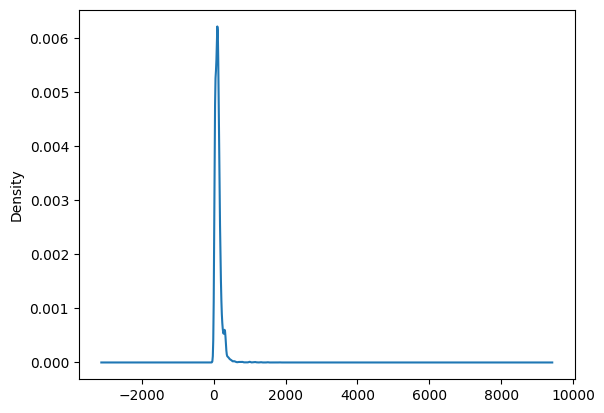

In [39]:
listings.price.plot.kde()

In [40]:
listings.price.loc[listings.price > 1000].value_counts().sort_index()


price
1014.0    1
1089.0    1
1114.0    1
1148.0    3
1150.0    1
1200.0    1
1300.0    2
1326.0    1
1500.0    2
1831.0    1
5796.0    1
6286.0    1
Name: count, dtype: int64

<Axes: xlabel='price'>

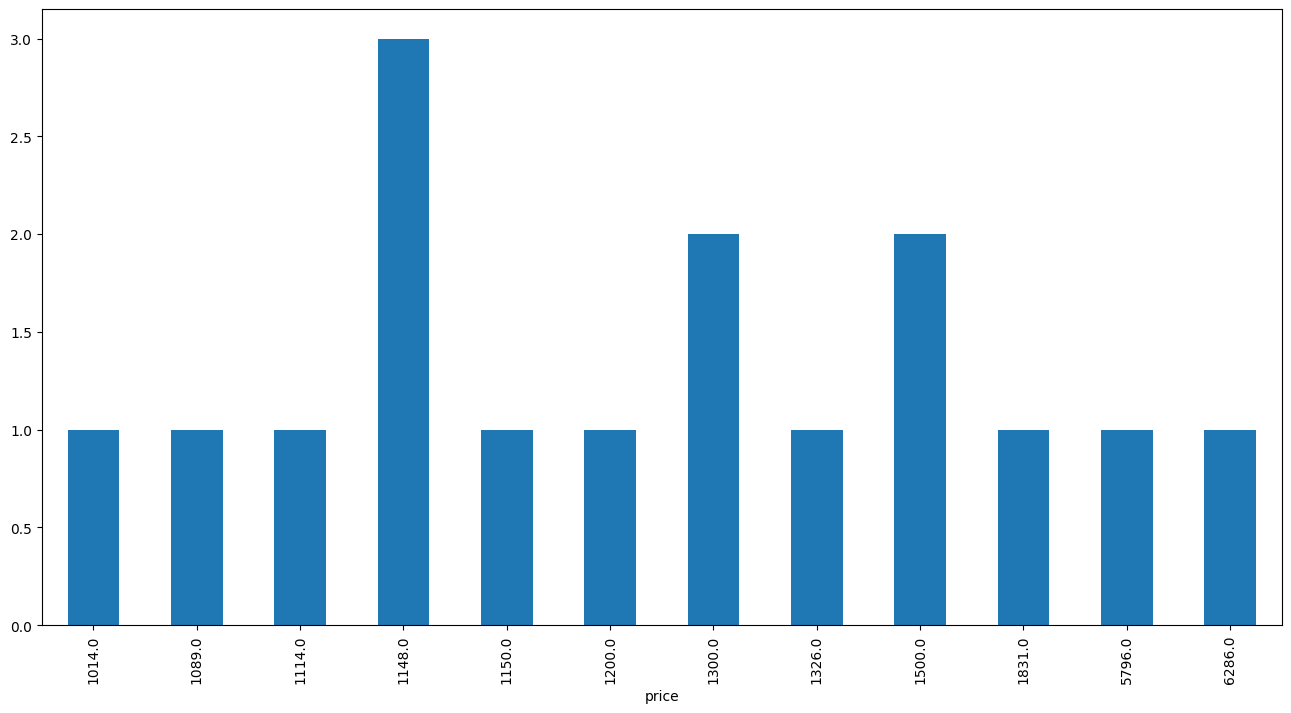

In [41]:
# more than 1000€ the night

plt.figure(figsize = (16,8))
plt.xticks(size = 10)

listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()



<Axes: xlabel='price'>

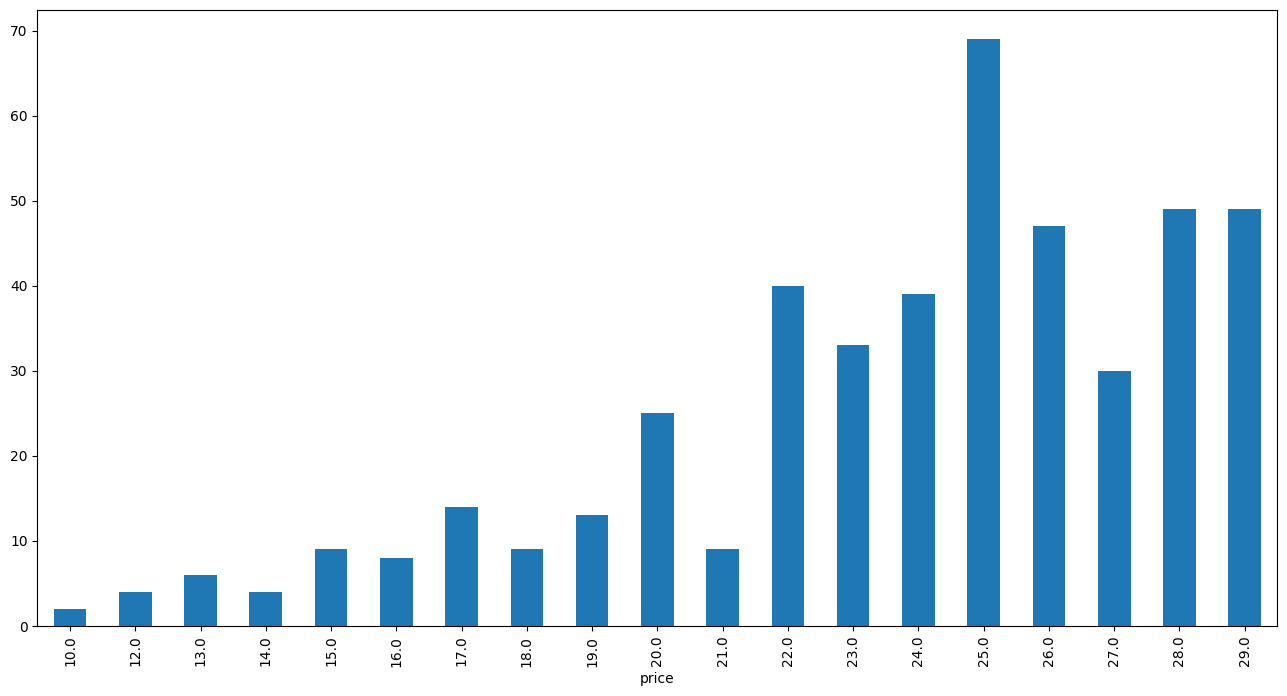

In [42]:
# less than 30€

plt.figure(figsize = (16,8))
plt.xticks(size = 10)

listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()



In [43]:
# discarding lower than 20€
# 

listings = listings.loc[listings.price > 19]

#### minimum nights

<Axes: ylabel='Density'>

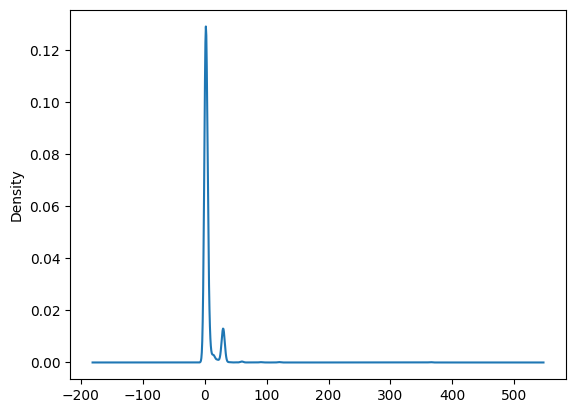

In [45]:
listings.minimum_nights.plot.kde()

In [46]:
listings.minimum_nights.loc[listings.minimum_nights > 100].value_counts().sort_index()


minimum_nights
120    8
150    1
180    1
300    1
360    1
365    6
Name: count, dtype: int64

<Axes: xlabel='minimum_nights'>

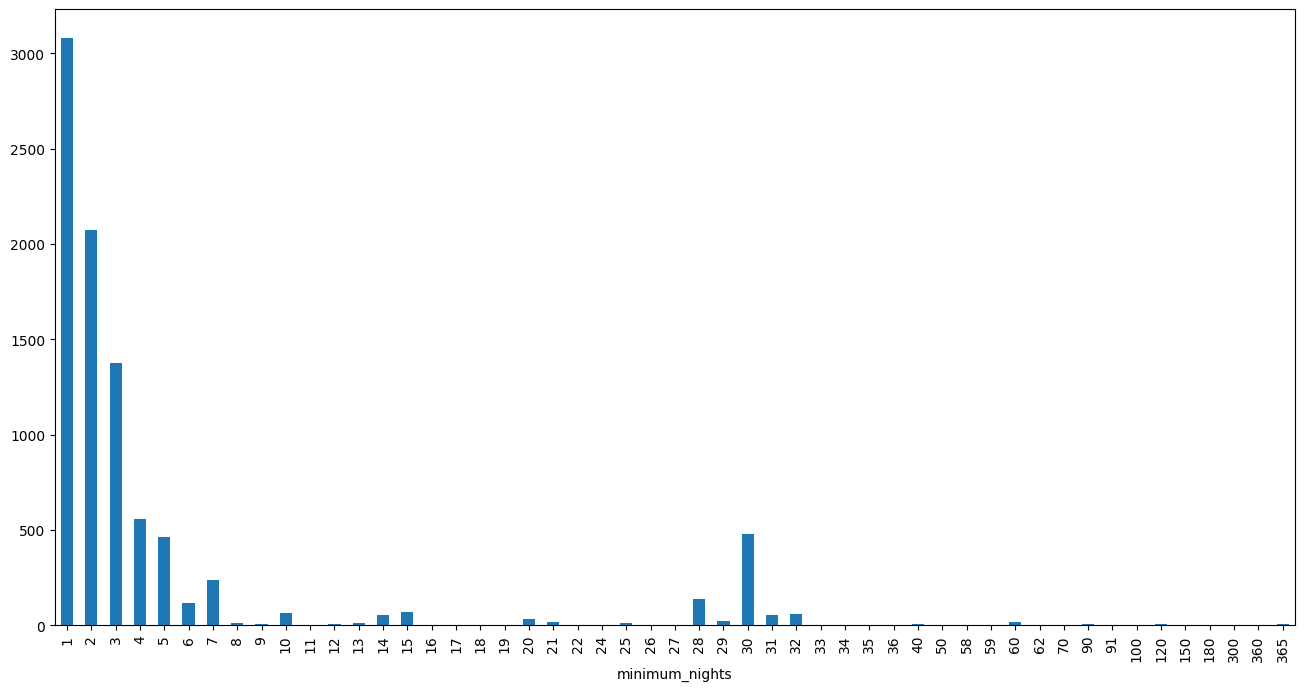

In [47]:


plt.figure(figsize = (16,8))
plt.xticks(size = 10)

listings.minimum_nights.value_counts().sort_index().plot.bar()


#### calculated_host_listings_count

<Axes: xlabel='calculated_host_listings_count'>

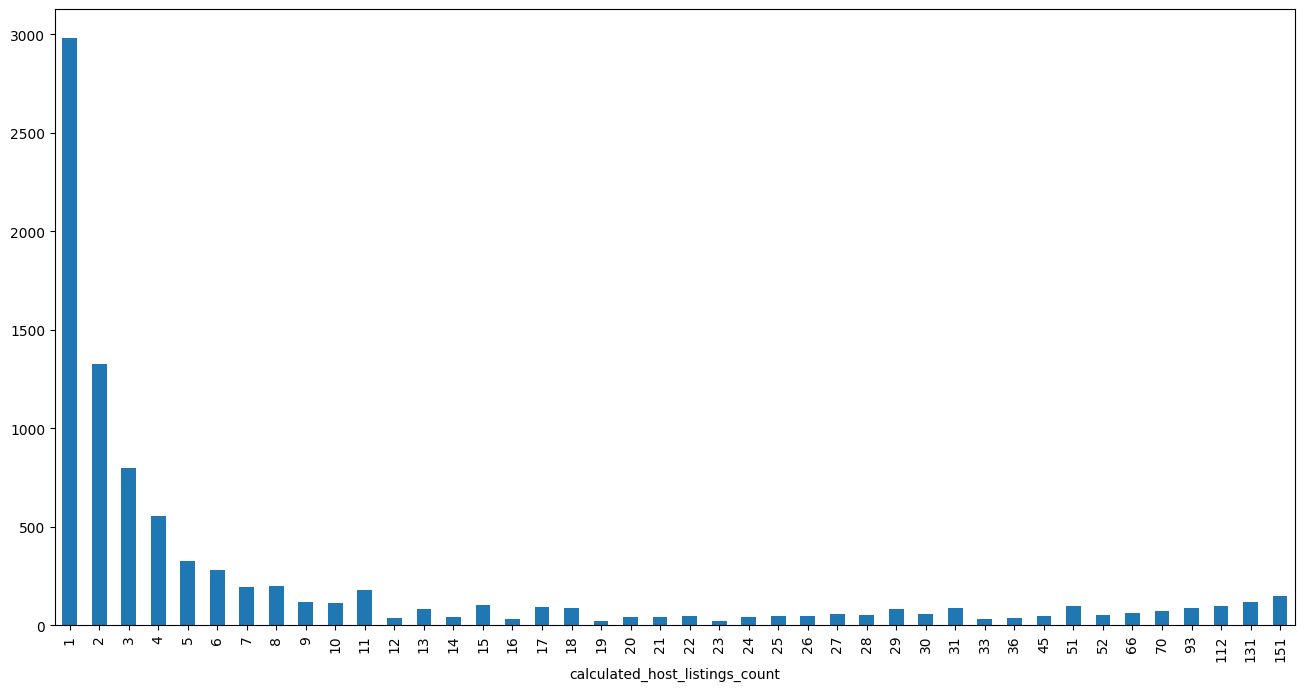

In [48]:



plt.figure(figsize = (16,8))
plt.xticks(size = 10)

listings.calculated_host_listings_count.value_counts().sort_index().plot.bar()



### Now with listings_det

In [49]:
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,48154,https://www.airbnb.com/rooms/48154,20240622134440,2024-06-22,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,https://a0.muscache.com/pictures/1109085/9c0d4...,...,4.78,4.49,4.52,VT-41540-V,f,4,4,0,0,0.97
1,1,136378,https://www.airbnb.com/rooms/136378,20240622134440,2024-06-23,city scrape,Old City Charm with Modern Comfort,None,None,https://a0.muscache.com/pictures/pro_photo_too...,...,4.80,4.84,4.56,VT-42161-V,f,2,2,0,0,0.16
2,2,149715,https://www.airbnb.com/rooms/149715,20240622134440,2024-06-23,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 3 and a...,"Surrounded by historic houses, authentic res...",https://a0.muscache.com/pictures/7507244a-87d8...,...,4.89,4.59,4.62,Nº TURISMO VT36469V CATEGORIA: standard,f,1,1,0,0,1.65
3,3,165971,https://www.airbnb.com/rooms/165971,20240622134440,2024-06-22,city scrape,★ Architectural touch! ★,"Hola! I am ready to welcome you in my apt., wh...",Just outside the old city centre (one block aw...,https://a0.muscache.com/pictures/10878830/ade6...,...,4.87,4.83,4.84,VT-32757-V,t,7,7,0,0,3.29
4,4,182221,https://www.airbnb.com/rooms/182221,20240622134440,2024-06-23,city scrape,Apartments Calatrava City Valencia,None,None,https://a0.muscache.com/pictures/1161513/9f7ac...,...,4.63,4.25,4.38,VT-38755-V,f,2,2,0,0,0.07


In [50]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         9596 non-null   int64  
 1   id                                            9596 non-null   int64  
 2   listing_url                                   9596 non-null   object 
 3   scrape_id                                     9596 non-null   int64  
 4   last_scraped                                  9596 non-null   object 
 5   source                                        9596 non-null   object 
 6   name                                          9596 non-null   object 
 7   description                                   9302 non-null   object 
 8   neighborhood_overview                         4728 non-null   object 
 9   picture_url                                   9596 non-null   o

In [51]:
a_incluir = (
    "id",
    "description",
    "host_is_superhost",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "number_of_reviews",
    "review_scores_rating",
    "review_scores_communication",
    "review_scores_location"  
            )

In [52]:
a_incluir

('id',
 'description',
 'host_is_superhost',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_communication',
 'review_scores_location')

In [53]:
listings_det = pd.read_sql_table("listings_det", con=con)
listings_det = listings_det.loc[:,a_incluir]

In [54]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9596 non-null   int64  
 1   description                  9302 non-null   object 
 2   host_is_superhost            9299 non-null   object 
 3   accommodates                 9596 non-null   int64  
 4   bathrooms                    9078 non-null   float64
 5   bedrooms                     9421 non-null   float64
 6   beds                         9081 non-null   float64
 7   number_of_reviews            9596 non-null   int64  
 8   review_scores_rating         7801 non-null   float64
 9   review_scores_communication  7796 non-null   float64
 10  review_scores_location       7796 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 824.8+ KB


In [55]:
listings_det["host_is_superhost"] = listings_det["host_is_superhost"].astype("category")


In [56]:
listings_det.isna().sum()

id                                0
description                     294
host_is_superhost               297
accommodates                      0
bathrooms                       518
bedrooms                        175
beds                            515
number_of_reviews                 0
review_scores_rating           1795
review_scores_communication    1800
review_scores_location         1800
dtype: int64

In [57]:
# bedrooms and beds are problematic, let's try to impute them or something

# he uses Madrid, where he has more nulls in bedrooms than in beds.
# In my case it's the other way around, so I have to be careful that this works for me.




### Impute beds

In [58]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
beds,,,,,,,,,,,,,,,
0.0,231,516,85,275,83,100,9,17,1,3,0,1,1,0,3
1.0,711,1723,114,180,9,8,1,1,0,0,0,0,0,0,0
2.0,34,511,452,1165,51,37,0,3,0,0,0,0,0,0,0
3.0,2,21,69,648,303,292,8,15,2,0,1,0,0,0,0
4.0,4,10,22,148,193,321,54,68,2,0,1,1,1,0,0
5.0,3,3,0,16,35,130,54,61,7,11,0,1,0,0,0
6.0,0,2,0,5,5,29,15,44,6,7,2,5,0,1,0
7.0,0,0,0,0,2,3,4,25,6,6,1,1,1,0,0
8.0,0,0,0,1,0,1,1,5,4,5,2,1,1,1,1


In [2]:
# it seems that it can be imputed, but I have quite a few nulls in my accommodations
# No, my accommodations are actually at 0 nulls
# let's try to drop the nulls

#pd.crosstab(listings_det.beds.dropna(), listings_det.accommodates.dropna())

# I'm removing it because it's the same thing, crosstab must drop nan by default or something


In [62]:
#before

listings_det.beds.value_counts(dropna = False)

beds
1.0     2747
2.0     2253
3.0     1361
0.0     1325
4.0      825
NaN      515
5.0      321
6.0      121
7.0       49
8.0       23
10.0      11
9.0       11
20.0       6
11.0       3
14.0       3
26.0       3
31.0       3
15.0       3
12.0       3
22.0       2
16.0       2
28.0       1
29.0       1
27.0       1
13.0       1
17.0       1
24.0       1
Name: count, dtype: int64

In [80]:

def imputar_nulos(registro):
    
    condiciones = [
        (registro.accommodates <= 2),
        (registro.accommodates > 2) & (registro.accommodates <= 4),
        (registro.accommodates > 4) & (registro.accommodates <= 6),
        (registro.accommodates > 6)
    ]
    
    resultados = [1,2,3,4]

    
    return(np.select(condiciones,resultados, default = -999))


    


In [66]:
# nulls
listings_det.loc[listings_det.beds.isna() & listings_det.accommodates.isna()]

# wow that's great, we're going to be lucky that there are no double nulls
# I'm an idiot, no, accommodates never had nulls

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location


In [81]:

listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('float64')


32      1.0
40      2.0
94      3.0
118     4.0
139     1.0
       ... 
8956    1.0
8962    1.0
9023    1.0
9025    4.0
9033    3.0
Length: 515, dtype: float64

In [82]:

listings_det.loc[listings_det.beds.isna(), "beds"] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('float64')


Series([], Name: beds, dtype: float64)

In [87]:
listings_det.isna().sum()

# There are no more nulls in beds


id                                0
description                     294
host_is_superhost               297
accommodates                      0
bathrooms                       518
bedrooms                        175
beds                              0
number_of_reviews                 0
review_scores_rating           1795
review_scores_communication    1800
review_scores_location         1800
dtype: int64

In [88]:
#after

listings_det.beds.value_counts(dropna = False)

beds
1.0     3020
2.0     2385
3.0     1438
0.0     1325
4.0      858
5.0      321
6.0      121
7.0       49
8.0       23
9.0       11
10.0      11
20.0       6
14.0       3
15.0       3
11.0       3
26.0       3
31.0       3
12.0       3
16.0       2
22.0       2
27.0       1
29.0       1
13.0       1
17.0       1
28.0       1
24.0       1
Name: count, dtype: int64

### Impute bedrooms

In [89]:
pd.crosstab(listings_det.bedrooms, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
bedrooms,,,,,,,,,,,,,,,
0.0,21,305,67,135,8,7,1,5,0,1,0,0,0,0,0
1.0,953,2455,470,989,49,42,3,8,1,3,0,3,0,1,2
2.0,23,73,212,1131,268,349,18,20,6,1,1,0,2,2,0
3.0,15,17,20,260,336,451,55,115,10,6,1,1,0,0,0
4.0,15,9,0,13,49,109,54,90,10,7,4,3,0,1,3
5.0,2,2,0,0,6,7,19,15,4,18,5,2,1,0,3
6.0,1,1,0,0,0,1,2,5,1,2,1,3,0,2,2
7.0,0,0,0,0,0,0,1,1,2,1,0,1,0,2,2
8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [90]:
pd.crosstab(listings_det.bedrooms, listings_det.beds)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,16.0,17.0,20.0,22.0,24.0,26.0,27.0,28.0,29.0,31.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
0.0,62,168,278,20,13,4,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,843,2617,1269,172,56,7,2,0,1,0,...,1,0,5,1,0,0,0,0,0,0
2.0,220,43,781,727,274,39,13,6,0,1,...,0,0,1,0,0,0,0,0,0,0
3.0,147,19,37,506,331,166,59,13,5,1,...,1,0,0,0,0,0,0,0,0,0
4.0,43,11,4,12,174,62,24,19,9,4,...,0,0,0,0,0,0,0,0,0,0
5.0,7,3,0,1,5,43,7,5,6,4,...,0,0,0,0,1,0,0,0,0,0
6.0,1,2,0,0,2,0,10,1,2,1,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,1,5,0,0,...,0,0,0,1,0,0,0,0,0,0
8.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#let's impute the number of bedrooms using the information we have about the beds
# if it has 0,1,2 beds, it has one room
# if it has 3,4 beds, two rooms
# if it has 5,6, three rooms
# if it has more, four rooms


In [93]:

def imputar_nulos(registro):
    # lista de condiciones
    condiciones = [
        (registro.beds <= 2),
        (registro.beds > 2) & (registro.beds <= 4),
        (registro.beds > 4) & (registro.beds <= 6),
        (registro.beds > 6)
    ]
    # lista de resultados
    resultados = [1,2,3,4]
    # los valores son los mismos pero es casualidad
    # salida
    return(np.select(condiciones,resultados, default = -999))

listings_det.loc[listings_det.bedrooms.isna(), "bedrooms"] = \
listings_det.loc[listings_det.bedrooms.isna()].apply(imputar_nulos, axis = 1).astype('float64')


In [94]:
listings_det.bedrooms.value_counts(dropna = False)

bedrooms
1.0     5151
2.0     2107
3.0     1287
0.0      550
4.0      369
5.0       84
6.0       21
7.0       10
15.0       9
8.0        2
13.0       2
10.0       1
9.0        1
17.0       1
12.0       1
Name: count, dtype: int64

In [95]:
listings_det.isna().sum()


id                                0
description                     294
host_is_superhost               297
accommodates                      0
bathrooms                       518
bedrooms                          0
beds                              0
number_of_reviews                 0
review_scores_rating           1795
review_scores_communication    1800
review_scores_location         1800
dtype: int64

In [ ]:
# we are doing this because the number of rooms is important to us
#[we are going to estimate the price based on the m2, which is based on the number of inhabitants]


### Duplicates

In [96]:
listings_det.duplicated().sum()

0

### we take advantage to analyze categories

In [99]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    6896
t    2403
Name: count, dtype: int64

### Numerics of listings_det 

In [101]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           9596 non-null   int64   
 1   description                  9302 non-null   object  
 2   host_is_superhost            9299 non-null   category
 3   accommodates                 9596 non-null   int64   
 4   bathrooms                    9078 non-null   float64 
 5   bedrooms                     9596 non-null   float64 
 6   beds                         9596 non-null   float64 
 7   number_of_reviews            9596 non-null   int64   
 8   review_scores_rating         7801 non-null   float64 
 9   review_scores_communication  7796 non-null   float64 
 10  review_scores_location       7796 non-null   float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 759.3+ KB


In [102]:
listings_det.describe(include= "number").T

,count,mean,std,min,25%,50%,75%,max
id,9596.0,6.353315e+17,4.740290e+17,48154.0,43351991.25,8.425802e+17,1.071721e+18,1.184465e+18
accommodates,9596.0,3.483639e+00,1.960911e+00,1.0,2.00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,9078.0,1.294503e+00,5.712818e-01,0.0,1.00,1.000000e+00,1.500000e+00,1.150000e+01
bedrooms,9596.0,1.619737e+00,1.134123e+00,0.0,1.00,1.000000e+00,2.000000e+00,1.700000e+01
beds,9596.0,2.007503e+00,1.855641e+00,0.0,1.00,2.000000e+00,3.000000e+00,3.100000e+01
number_of_reviews,9596.0,4.267893e+01,7.594395e+01,0.0,2.00,1.200000e+01,4.700000e+01,8.600000e+02
review_scores_rating,7801.0,4.655370e+00,4.179813e-01,1.0,4.53,4.760000e+00,4.910000e+00,5.000000e+00
review_scores_communication,7796.0,4.792640e+00,3.669948e-01,1.0,4.75,4.900000e+00,5.000000e+00,5.000000e+00
review_scores_location,7796.0,4.682028e+00,3.695502e-01,1.0,4.56,4.770000e+00,4.930000e+00,5.000000e+00


In [103]:

# bathrooms probably can be imputed

pd.crosstab(listings_det.bathrooms, listings_det.bedrooms)

# I don't get how they have a bathroom but no bedroom
# I don't get how they have 1.5 bathrooms, it doesn't make sense
# it seems that the normal thing is that they have one or two bathrooms. Let's impute

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,13.0,15.0,17.0
bathrooms,,,,,,,,,,,,,,
0.0,13,14,6,4,2,0,0,0,0,0,0,0,0,1
0.5,3,92,3,5,1,0,0,0,0,0,0,0,0,0
1.0,448,3841,1284,544,62,2,1,0,1,0,0,0,4,0
1.5,13,356,144,102,34,2,0,0,0,0,0,0,0,0
2.0,60,472,530,517,193,48,8,4,0,0,0,0,5,0
2.5,0,18,22,19,9,2,1,0,0,0,0,0,0,0
3.0,3,26,6,29,18,12,3,4,0,1,0,0,0,0
3.5,0,1,0,7,5,1,1,1,0,0,0,0,0,0
4.0,6,11,0,0,19,8,1,0,1,0,0,0,0,0


<Axes: xlabel='bathrooms'>

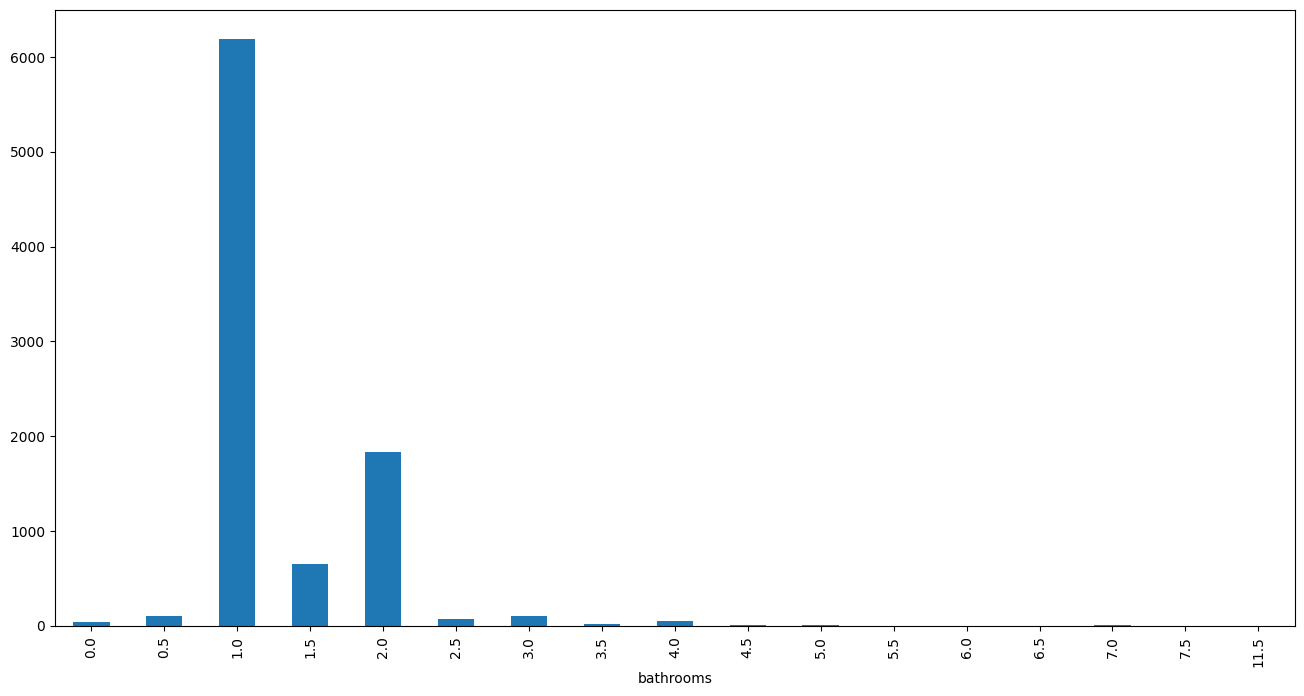

In [105]:
plt.figure(figsize = (16,8))
plt.xticks(size = 10)

listings_det.bathrooms.value_counts().sort_index().plot.bar()


In [107]:



def imputar_nulos(registro):
    # lista de condiciones
    condiciones = [
        (registro.bedrooms <= 3),
        (registro.bedrooms > 3)
    ]
    # lista de resultados
    resultados = [1,2]
    # los valores son los mismos pero es casualidad
    # salida
    return(np.select(condiciones,resultados, default = -999))

listings_det.loc[listings_det.bathrooms.isna(), "bathrooms"] = \
listings_det.loc[listings_det.bathrooms.isna()].apply(imputar_nulos, axis = 1).astype('float64')


In [108]:
listings_det.isna().sum()


id                                0
description                     294
host_is_superhost               297
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
number_of_reviews                 0
review_scores_rating           1795
review_scores_communication    1800
review_scores_location         1800
dtype: int64

## Datamart itself



In [114]:

df = pd.merge(left = listings, right = listings_det, how = "left", on = "id")
# will send the table on the left, we will have the sum of the columns (except id)
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,48154,Precioso apartamento con wifi,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,92.0,3,...,Second floor on a farm from the late 19th cent...,f,4,1.0,2.0,2.0,161,4.60,4.78,4.49
1,136378,Old City Charm with Modern Comfort,591197,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75.0,28,...,None,f,3,1.0,1.0,2.0,25,4.46,4.80,4.84
2,149715,1900 Style Valencian Beach Home for 10px,5947,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,269.0,2,...,Typical town house with 5 bedrooms and 3 and a...,f,10,4.0,5.0,7.0,259,4.66,4.89,4.59
3,165971,★ Architectural touch! ★,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,132.0,5,...,"Hola! I am ready to welcome you in my apt., wh...",NaN,5,1.0,1.0,1.0,517,4.87,4.87,4.83
4,182221,Apartments Calatrava City Valencia,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,180.0,3,...,None,f,5,1.0,2.0,5.0,8,4.50,4.63,4.25


In [115]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  14 non-null     int64 
 1   distrito   14 non-null     object
dtypes: int64(1), object(1)
memory usage: 356.0+ bytes


In [116]:
precio_m2.head()

,precio_m2,distrito
1,2792,Algirós
2,2112,Benicalap
3,2643,Benimaclet
4,2896,Camins al Grau
5,2870,Campanar


In [128]:

print(df.neighbourhood_group.unique().categories.shape)
df.neighbourhood_group.unique().categories

(19,)


Index(['ALGIROS', 'BENICALAP', 'BENIMACLET', 'CAMINS AL GRAU', 'CAMPANAR',
       'CIUTAT VELLA', 'EL PLA DEL REAL', 'EXTRAMURS', 'JESUS', 'L'EIXAMPLE',
       'L'OLIVERETA', 'LA SAIDIA', 'PATRAIX', 'POBLATS DE L'OEST',
       'POBLATS DEL NORD', 'POBLATS DEL SUD', 'POBLATS MARITIMS',
       'QUATRE CARRERES', 'RASCANYA'],
      dtype='object')

In [129]:
print(precio_m2.distrito.unique().shape)
precio_m2.distrito.unique()

(14,)


array(['Algirós', 'Benicalap', 'Benimaclet', 'Camins al Grau', 'Campanar',
       'Ciutat Vella', 'El Pla del Real', 'Extramurs', 'Jesús',
       "L'Eixample", "L'Olivereta", 'Patraix', 'Poblats Marítims',
       'Rascanya'], dtype=object)

In [137]:
# I don't have the price for QUATRE CARRETERES, I'll see how many apartments I have there.

df[df["neighbourhood_group"] == "LA SAIDIA"].shape


(532, 22)

In [130]:
# damn, 744 records, this is bad bad

# it's worse, I have 5 districts without knowing the price.
# I can look for the m2 price elsewhere, or not analyze those records

# Fine, I'm going to choose to manually enter that data

precio_m2



,precio_m2,distrito
1,2792,Algirós
2,2112,Benicalap
3,2643,Benimaclet
4,2896,Camins al Grau
5,2870,Campanar
6,3832,Ciutat Vella
7,3534,El Pla del Real
8,3125,Extramurs
9,2078,Jesús
10,4112,L'Eixample


In [158]:

nuevos_registros = pd.DataFrame([
    {'precio_m2': 2479, 'distrito': "LA SAIDIA"},
    {'precio_m2': 1599, 'distrito': "POBLATS DE L'OEST"},
    {'precio_m2': 1664, 'distrito': "POBLATS DEL NORD"},
    {'precio_m2': 2350, 'distrito': "POBLATS DEL SUD"},
    {'precio_m2': 2359, 'distrito': "QUATRE CARRERES"}
])


# Poblats de l'oest is complicated because there are those who put it together with the bell tower
# it has two neighborhoods, one is high and the other low, it changes quite a bit
# 2915
# 1599


# source: https://realadvisor.es/es/precios-viviendas/46013-valencia


precio_m2_plus = pd.concat([precio_m2, nuevos_registros], ignore_index=True)
precio_m2_plus

,precio_m2,distrito
0,2792,Algirós
1,2112,Benicalap
2,2643,Benimaclet
3,2896,Camins al Grau
4,2870,Campanar
5,3832,Ciutat Vella
6,3534,El Pla del Real
7,3125,Extramurs
8,2078,Jesús
9,4112,L'Eixample


In [159]:
precio_m2_plus.distrito = precio_m2_plus.distrito.map({"Algirós":"ALGIROS",
                                                      "Benicalap":"BENICALAP", 
                                                      "Benimaclet":"BENIMACLET", 
                                                      "Camins al Grau":"CAMINS AL GRAU", 
                                                      "Campanar":"CAMPANAR", 
                                                      "Ciutat Vella":"CIUTAT VELLA", 
                                                      "El Pla del Real":"EL PLA DEL REAL", 
                                                      "Extramurs":"EXTRAMURS", 
                                                      "Jesús":"JESUS", 
                                                      "L'Eixample":"L'EIXAMPLE",
                                                       "L'Olivereta":"L'OLIVERETA", 
                                                      "Patraix":"PATRAIX", 
                                                      "Poblats Marítims":"POBLATS MARITIMS", 
                                                      "Rascanya":"RASCANYA" 
                                                      }).fillna(precio_m2_plus.distrito)

In [150]:
df.neighbourhood_group.unique().categories

Index(['ALGIROS', 'BENICALAP', 'BENIMACLET', 'CAMINS AL GRAU', 'CAMPANAR',
       'CIUTAT VELLA', 'EL PLA DEL REAL', 'EXTRAMURS', 'JESUS', 'L'EIXAMPLE',
       'L'OLIVERETA', 'LA SAIDIA', 'PATRAIX', 'POBLATS DE L'OEST',
       'POBLATS DEL NORD', 'POBLATS DEL SUD', 'POBLATS MARITIMS',
       'QUATRE CARRERES', 'RASCANYA'],
      dtype='object')

In [160]:
precio_m2_plus

,precio_m2,distrito
0,2792,ALGIROS
1,2112,BENICALAP
2,2643,BENIMACLET
3,2896,CAMINS AL GRAU
4,2870,CAMPANAR
5,3832,CIUTAT VELLA
6,3534,EL PLA DEL REAL
7,3125,EXTRAMURS
8,2078,JESUS
9,4112,L'EIXAMPLE


In [163]:

df_mergeado = pd.merge(left = df, right = precio_m2_plus, how = "left", left_on = "neighbourhood_group", right_on = "distrito")
df_mergeado.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,48154,Precioso apartamento con wifi,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,92.0,3,...,4,1.0,2.0,2.0,161,4.60,4.78,4.49,2479,LA SAIDIA
1,136378,Old City Charm with Modern Comfort,591197,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75.0,28,...,3,1.0,1.0,2.0,25,4.46,4.80,4.84,3832,CIUTAT VELLA
2,149715,1900 Style Valencian Beach Home for 10px,5947,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,269.0,2,...,10,4.0,5.0,7.0,259,4.66,4.89,4.59,2662,POBLATS MARITIMS
3,165971,★ Architectural touch! ★,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,132.0,5,...,5,1.0,1.0,1.0,517,4.87,4.87,4.83,3125,EXTRAMURS
4,182221,Apartments Calatrava City Valencia,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,180.0,3,...,5,1.0,2.0,5.0,8,4.50,4.63,4.25,2896,CAMINS AL GRAU


In [164]:
df_mergeado.precio_m2.isna().sum()

0

In [165]:
df_mergeado.to_sql("df_mergeado", con = con, if_exists="replace")

9002

In [166]:
df_mergeado.to_sql("df", con = con, if_exists="replace")

9002